<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Speckle-Analysis" data-toc-modified-id="Speckle-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Speckle Analysis</a></span><ul class="toc-item"><li><span><a href="#Test-image" data-toc-modified-id="Test-image-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Test image</a></span></li><li><span><a href="#Local-Contrast" data-toc-modified-id="Local-Contrast-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Local Contrast</a></span></li></ul></li><li><span><a href="#Objective-Speckle" data-toc-modified-id="Objective-Speckle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objective Speckle</a></span><ul class="toc-item"><li><span><a href="#Masks" data-toc-modified-id="Masks-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Masks</a></span></li><li><span><a href="#Isotropic-Speckle-at-Nyquist-Limit-(2-pixels-per-smallest-pixel)" data-toc-modified-id="Isotropic-Speckle-at-Nyquist-Limit-(2-pixels-per-smallest-pixel)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Isotropic Speckle at Nyquist Limit (2 pixels per smallest pixel)</a></span></li><li><span><a href="#Isotropic-Speckle-at-4-pixels-per-smallest-pixel" data-toc-modified-id="Isotropic-Speckle-at-4-pixels-per-smallest-pixel-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Isotropic Speckle at 4 pixels per smallest pixel</a></span></li><li><span><a href="#Elliptical-Speckle-at-4-pixels-per-smallest-pixel" data-toc-modified-id="Elliptical-Speckle-at-4-pixels-per-smallest-pixel-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Elliptical Speckle at 4 pixels per smallest pixel</a></span></li><li><span><a href="#Near-Isotropic-Speckle-at-4-pixels-per-smallest-pixel" data-toc-modified-id="Near-Isotropic-Speckle-at-4-pixels-per-smallest-pixel-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Near-Isotropic Speckle at 4 pixels per smallest pixel</a></span></li></ul></li><li><span><a href="#Subjective-Speckle" data-toc-modified-id="Subjective-Speckle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Subjective Speckle</a></span></li></ul></div>

In [1]:
# Excute this cell first (click in it and press shift-return)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import imageio
#from scipy import ndimage
from scipy import signal

import pyspeckle as speckle

In [2]:
dir(speckle)

['__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'create_objective',
 'create_subjective',
 'local_contrast_2D',
 'local_contrast_2D_plot',
 'pyspeckle',
 'statistics_plot']

# Speckle Analysis

## Test image

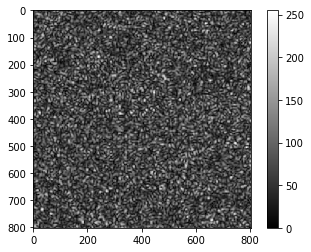

In [3]:
im = imageio.imread('speckle.png')
plt.imshow(im, cmap='gray')
plt.colorbar()
plt.show()

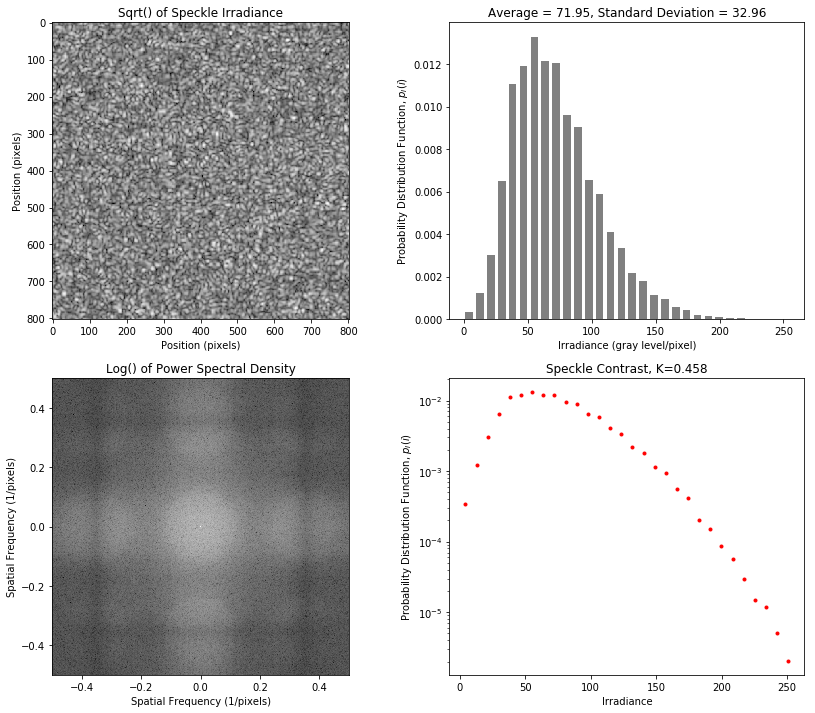

In [4]:
aplt = speckle.statistics_plot(im)
aplt.show()

## Local Contrast

 $$
 z[k] = (x * y)(k - N + 1)
               = \sum_{l=0}^{||x||-1}x_l y_{l-k+N-1}^{*}
$$

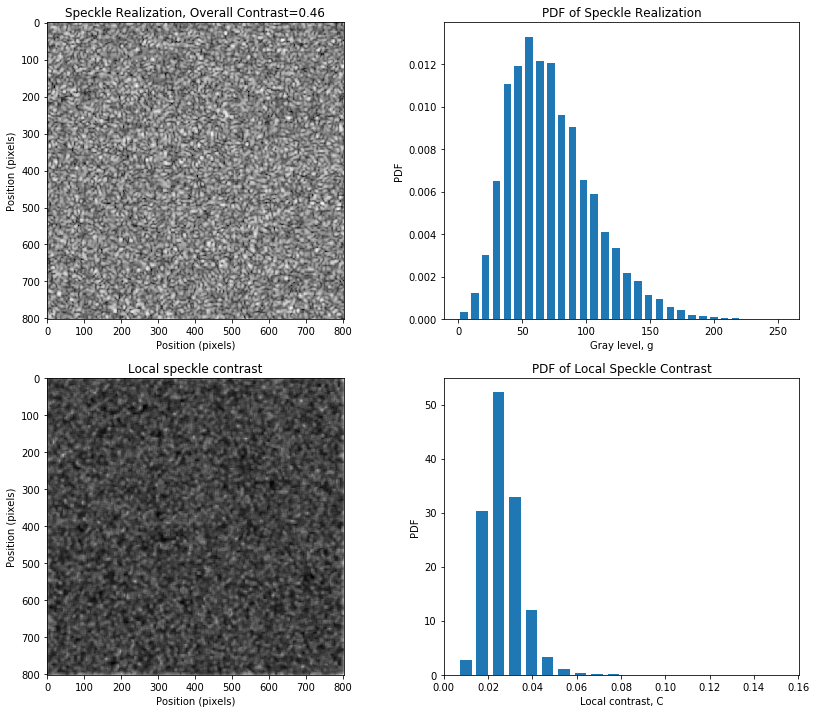

In [5]:
kernel=np.ones((10,10))
aplt=speckle.local_contrast_2D_plot(im,kernel)
aplt.show()

# Objective Speckle

## Masks

These routines won't typically be called directly, but are used internally to create speckle.  These routines are not exported by default and to use them requires a special import.  

This just shows that the function is working as expected.

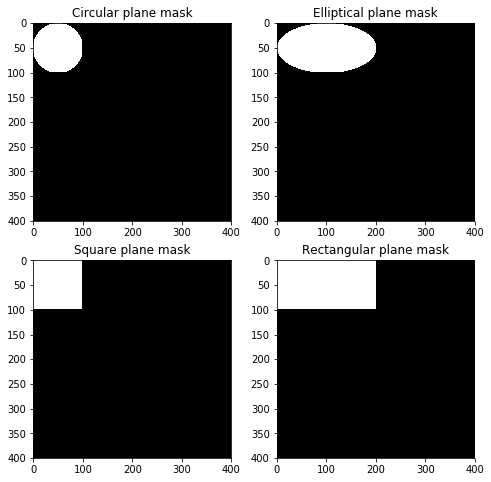

In [6]:
import pyspeckle.pyspeckle
L=100
pix_per_speckle=4
N = pix_per_speckle * L
R = int(L/2)

plt.subplots(2,2, figsize=(8,8))
plt.subplot(2,2,1)
mask = pyspeckle.pyspeckle._create_mask(N,R,R)
plt.imshow(mask,cmap='gray')
plt.title('Circular plane mask')

plt.subplot(2,2,2)
mask = pyspeckle.pyspeckle._create_mask(N,L,R)
plt.imshow(mask,cmap='gray')
plt.title('Elliptical plane mask')

plt.subplot(2,2,3)
mask = pyspeckle.pyspeckle._create_mask(N,R,R,spot='square')
plt.imshow(mask,cmap='gray')
plt.title('Square plane mask')

plt.subplot(2,2,4)
mask = pyspeckle.pyspeckle._create_mask(N,L,R,spot='square')
plt.imshow(mask,cmap='gray')
plt.title('Rectangular plane mask')

plt.show()

## Isotropic Speckle at Nyquist Limit (2 pixels per smallest pixel)

This speckle pattern has an exponential probability distribution function that is spatially bandwidth-limited by the specified pixels per speckle.  The statistics are uniform in all directions.

The Power Spectral Density can be used to establish the dimensions of the
minimum speckle size. When the display reaches the edge of the image,
the speckle pattern (in that dimension) is at Nyquist, i.e., two
pixels per (minimum) speckle.  This is what we observe here.


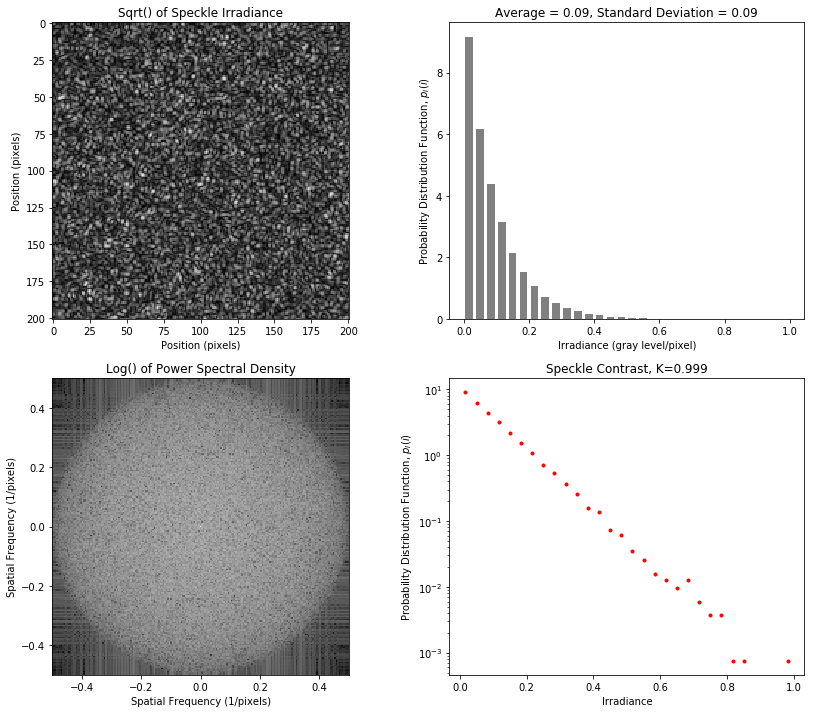

In [7]:
y = speckle.create_objective(201,2)
aplt = speckle.statistics_plot(y)
aplt.show()

## Isotropic Speckle at 4 pixels per smallest pixel

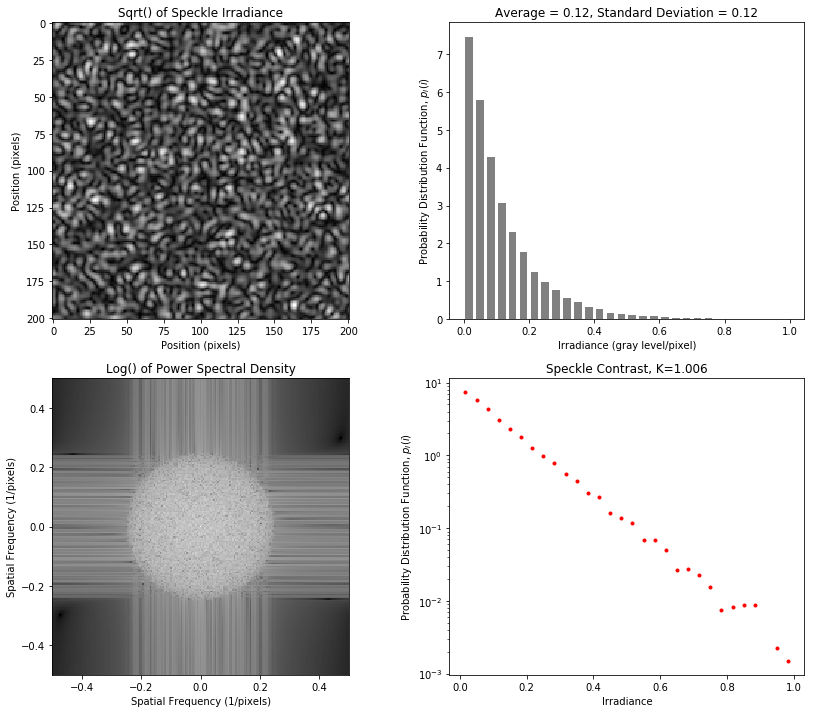

In [8]:
y = speckle.create_objective(201,4)
aplt = speckle.statistics_plot(y)
aplt.show()

## Elliptical Speckle at 4 pixels per smallest pixel

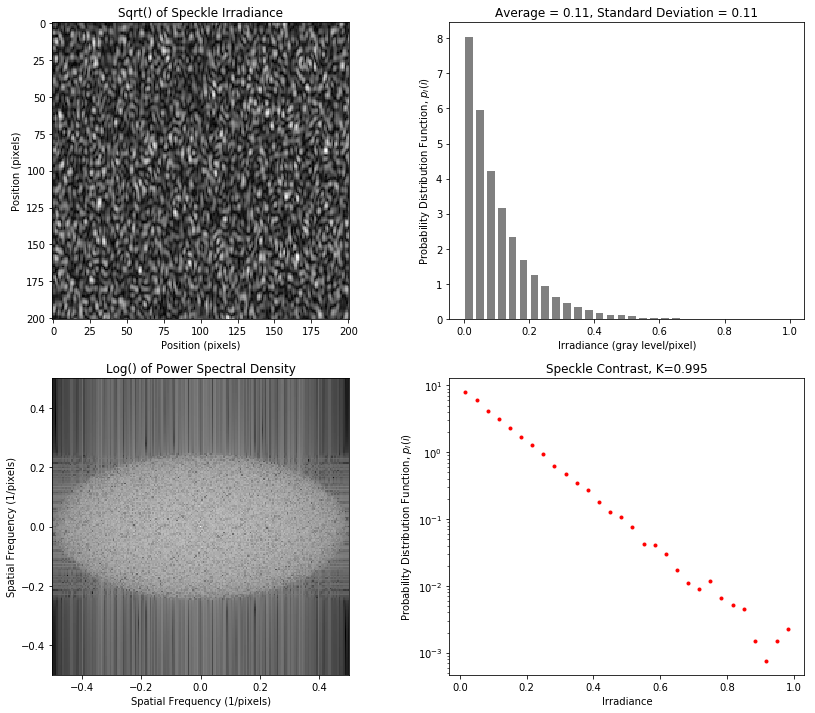

In [9]:
y = speckle.create_objective(201,2,alpha=0.5)
aplt = speckle.statistics_plot(y)
aplt.show()

## Near-Isotropic Speckle at 4 pixels per smallest pixel

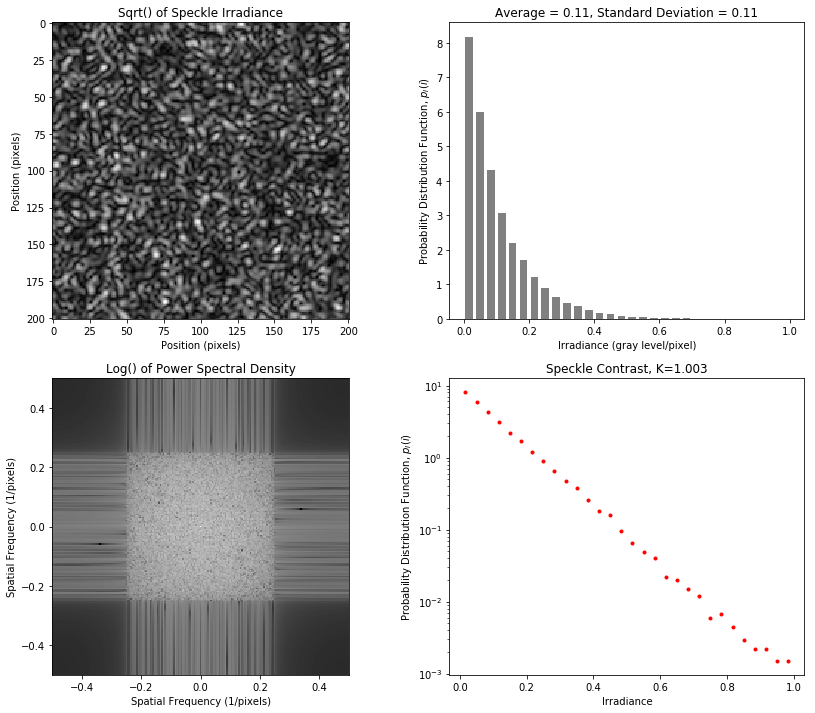

In [10]:
y = speckle.create_objective(201,4,spot='square')
aplt = speckle.statistics_plot(y)
aplt.show()

# Subjective Speckle

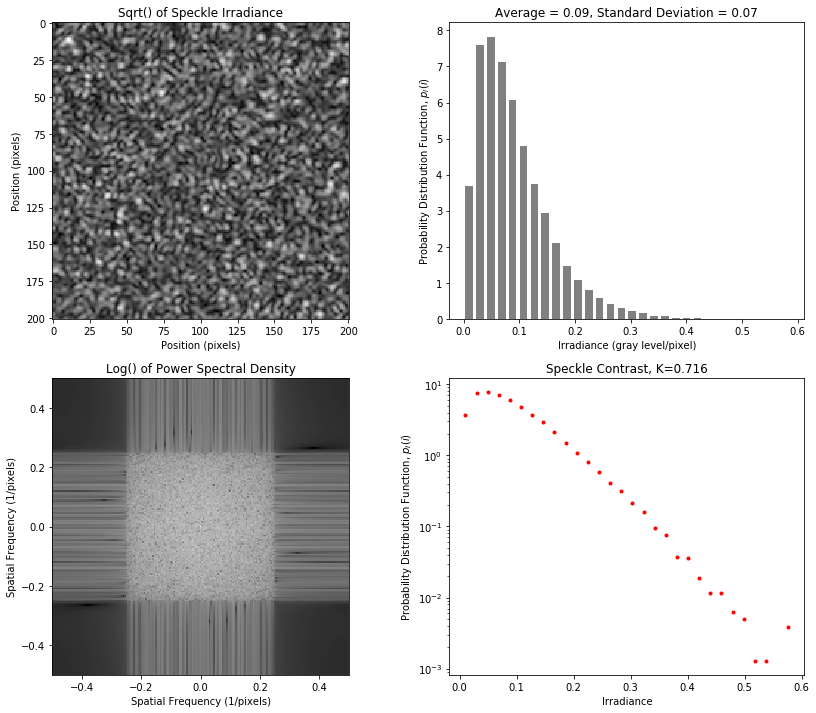

In [11]:
y = speckle.create_subjective(201,4,spot='square')
aplt = speckle.statistics_plot(y)
aplt.show()
